<a href="https://colab.research.google.com/github/Giradon/TIL/blob/master/Practice_LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- logistic model 만들어 해석하기
- valid model로 predict 하기

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
df = pd.read_csv('/Train.csv')
test = pd.read_csv('/Valid.csv')
print(df.head())
print(test.head())

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       0.0          0         0       4   2   2           0   73
1        0       1.2          1         0       4   2   2           1   73
2        1       1.8          1         0       4   1   2           0   53
3        0       0.0          1         0       4   2   2           0   57
4        1      52.0          1         1       6   4   3           0   65
   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       1.2          1         0       5   1   3           0   42
1        1       1.0          1         0       4   2   2           0   45
2        1       9.2          1         0       6   4   3           0   69
3        1       0.0          0         0       5   5   1           0   64
4        0       2.3          1         1       5   1   3           0   72


relapse를 label으로 넣고 유의미한것들로 모델 만들기

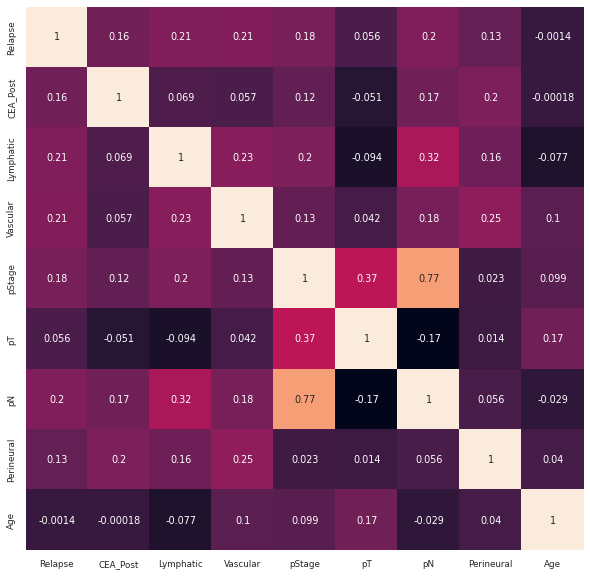

In [ ]:
# 상관계수 행렬
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [ ]:
# 변수 간의 상관관계 분석 - Target 변수와 상관관계가 높은 순서대로 정리
corr_order = df_corr.loc[:'Age', 'Relapse'].abs().sort_values(ascending=False)
corr_order

Relapse       1.000000
Vascular      0.208355
Lymphatic     0.206385
pN            0.204281
pStage        0.180064
CEA_Post      0.163411
Perineural    0.130624
pT            0.056499
Age           0.001398
Name: Relapse, dtype: float64

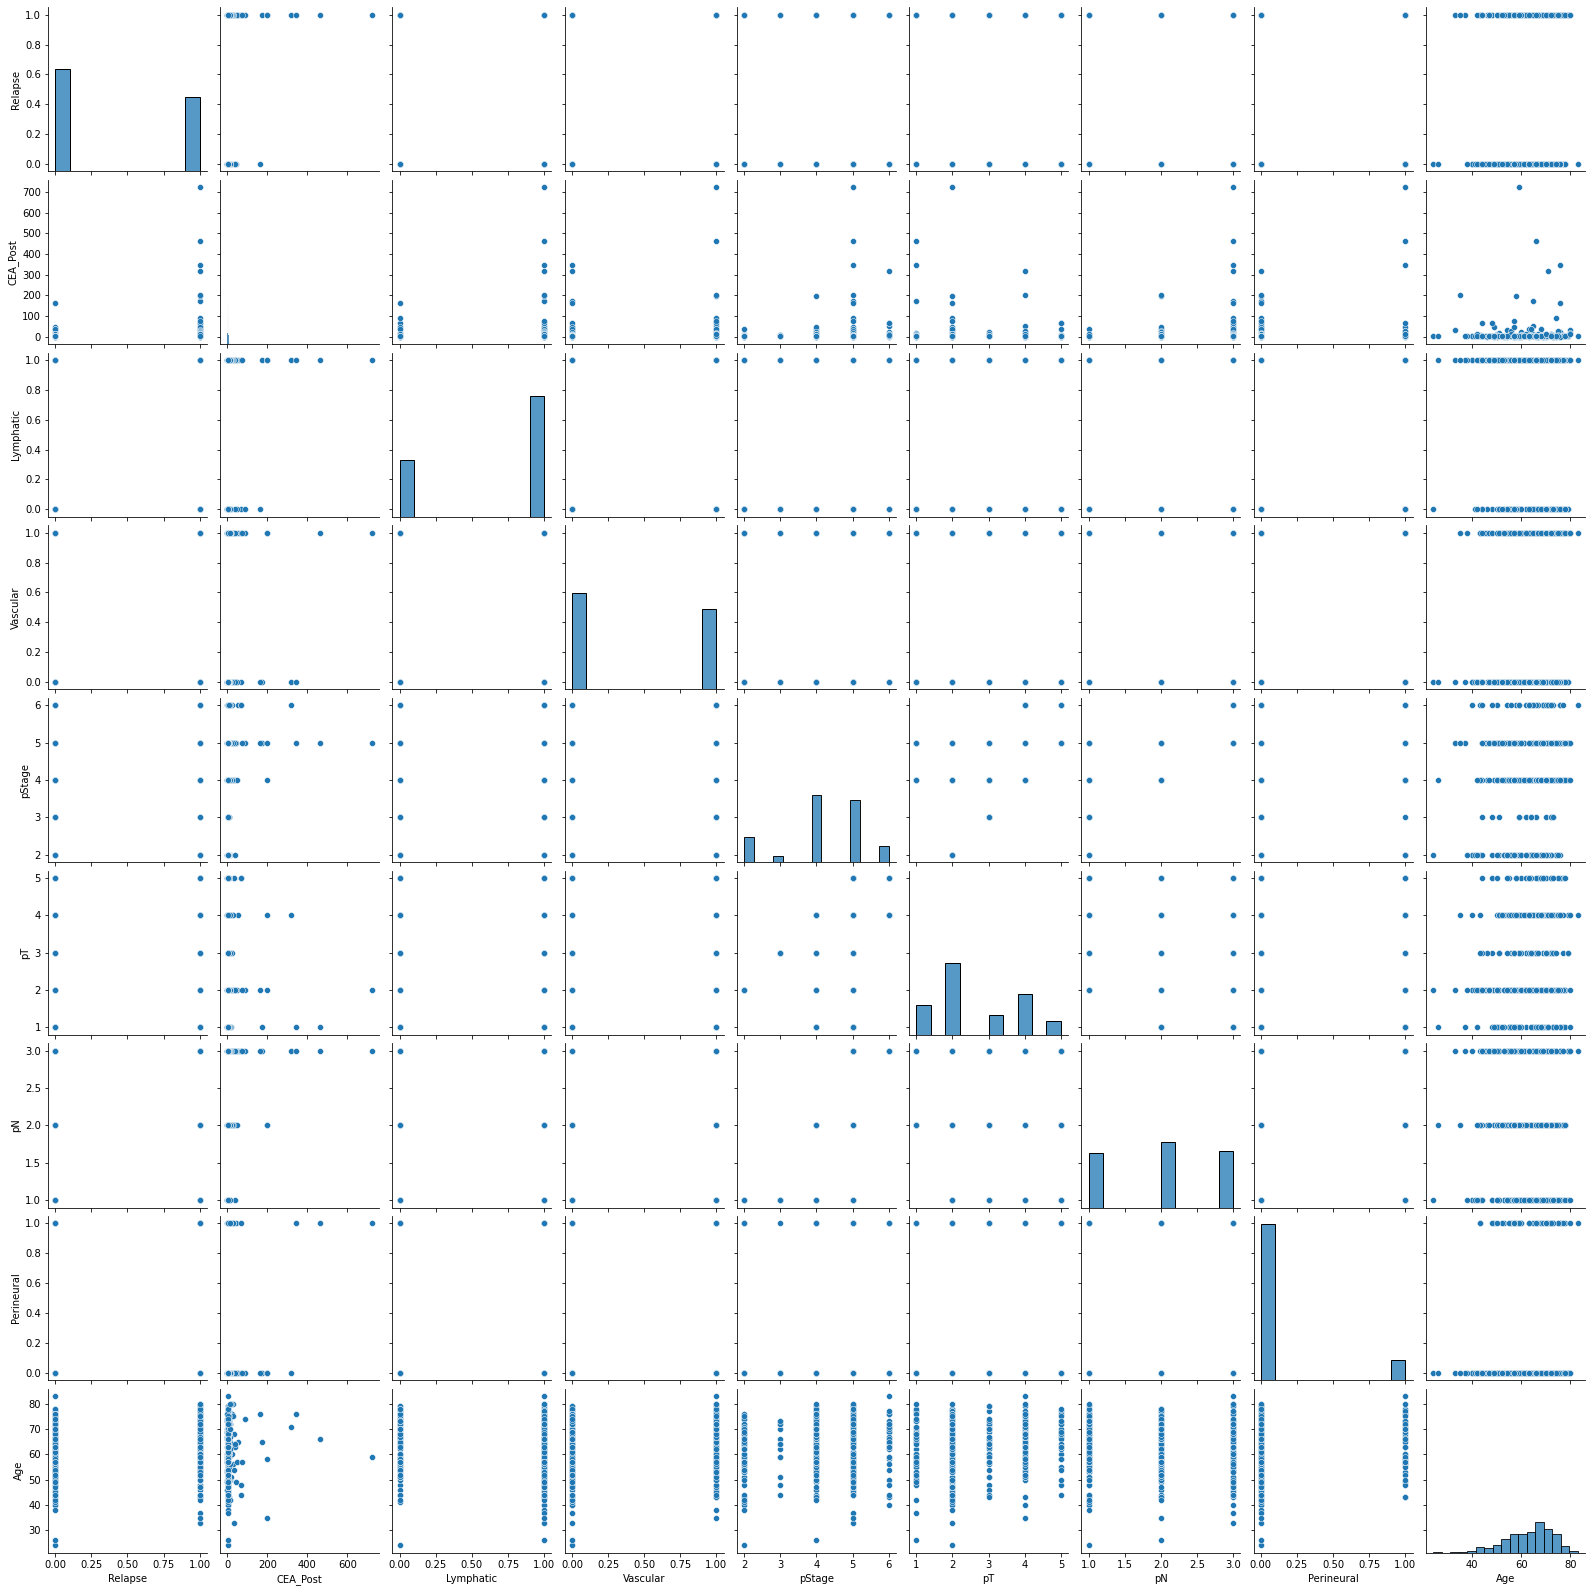

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
Label = df['Relapse']
InputFeature = df[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'pT', 'pN', 'Perineural', 'Age']]

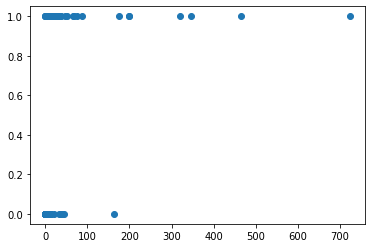

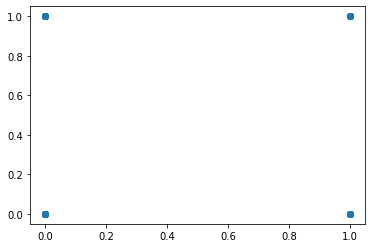

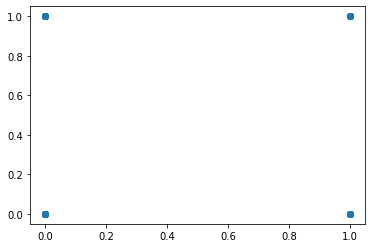

In [ ]:
plt.plot(InputFeature['CEA_Post'], Label, 'o')
plt.show()

plt.plot(InputFeature['Lymphatic'], Label, 'o')
plt.show()

plt.plot(InputFeature['Vascular'], Label, 'o')
plt.show()

In [ ]:
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(Label, InputFeature)
model = model.fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.614428
         Iterations 8
const        -1.969500
CEA_Post      0.018205
Lymphatic     0.639076
Vascular      0.582773
pStage       -0.159252
pT            0.240697
pN            0.511047
Perineural    0.304236
Age          -0.003822
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print( model.summary() )

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.09721
Time:                        07:13:14   Log-Likelihood:                -240.86
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.785e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9695      0.828     -2.378      0.017      -3.593      -0.346
CEA_Post       0.0182      0.009      2.127      0.033       0.001       0.035
Lymphatic      0.6391      0.261      2.445      0.0

Logistic regression 모델 해석하기
Coefficient: ln ( odds ) = 0.0182 * CEA_Post + 0.6391 * Lymphatic + 0.5828 * Vascular + const

odds를 알기 위해서는 exponential을 해주어야한다. (log 없애기)

In [ ]:
valid = test[['CEA_Post', 'Lymphatic', 'Vascular', 'pStage', 'Perineural']]

In [ ]:
np.exp(model.params).round(4)

const         0.1395
CEA_Post      1.0184
Lymphatic     1.8947
Vascular      1.7910
pStage        0.8528
pT            1.2721
pN            1.6670
Perineural    1.3556
Age           0.9962
dtype: float64

In [ ]:
df[['CEA_Post','Lymphatic', 'Vascular']]

,CEA_Post,Lymphatic,Vascular
0,0.0,0,0
1,1.2,1,0
2,1.8,1,0
3,0.0,1,0
4,52.0,1,1
...,...,...,...
387,1.7,0,0
388,4.1,0,0
389,2.2,1,0
390,5.2,0,0


In [ ]:
model.predict(test).head()

0    0.814269
1    0.350302
2    0.528416
3    0.214871
4    0.877196
dtype: float64

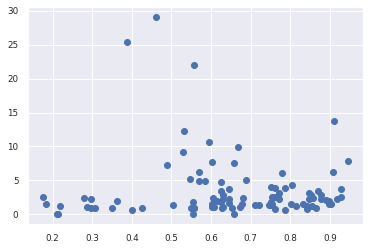

In [ ]:
plt.plot(model.predict(test), test['CEA_Post'], 'o')
plt.show()

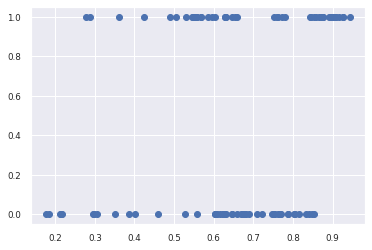

In [ ]:
plt.plot(model.predict(test), test['Vascular'], 'o')
plt.show()

In [ ]:
Lymphatic